In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import lasinglib as ll
import simulationlib as sl
import shapes

import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt

import optris_csv as ocsv
from scipy.signal import medfilt

import csv

### Use 'widget' to make mpl outputs interactive, and 'inline' to make them render as pngs. 
%matplotlib widget
# %matplotlib inline

TIME_CUTOFF = 9000
OPTRIS_SIGMA = 0.2
kernel_size = 15

## Helper Functions

In [45]:
def getMaxima(temperature, trigger = 5):
    local_maxima = []
    i = 0
    current_maximum = 0
    current_minimum = np.inf

    for t in temperature:
        if i % 2 == 1:
            if t >= current_maximum - trigger:
                current_maximum = max(t, current_maximum)
            else:
                local_maxima.append(current_maximum)
                current_maximum = 0
                i += 1
        else: 
            if t <= current_minimum + trigger:
                current_minimum = min(t, current_minimum)
            else:
                current_minimum = np.inf
                i += 1

    print(f"{len(local_maxima)} local maxima found")
    return local_maxima


In [46]:
def tempMap(local_maxima, d1, d2):
    grid_length = int(np.sqrt(len(local_maxima)))
    maxima_map = np.zeros((grid_length,grid_length))

    for i in range(len(local_maxima)):
        if d1 == "Left":
            y = grid_length - (i % grid_length + 1)
        elif d1 == "Right":
            y = i % grid_length
        elif d1 == "Up":
            x = i % grid_length
        elif d1 == "Down":
            x = grid_length - (i % grid_length + 1)

        if d2 == "Left":
            y = grid_length - (i // grid_length + 1)
        elif d2 == "Right":
            y = i // grid_length
        elif d2 == "Up":
            x = i // grid_length
        elif d2 == "Down":
            x = grid_length - (i // grid_length + 1)

        maxima_map[x, y] = local_maxima[i]

    return maxima_map

In [47]:
def tempPlot(figure_num, right_up = None, left_down = None, right_down = None, left_up = None, delim = ";", trigger1 = 5, trigger2 = 5, key = "Detector Area"):

    plt.close(figure_num)

    data = []

    if right_up != None:
        ru_data = ocsv.OptrisDataset(right_up,delim).build_array_data()
        ru_data = ru_data[ru_data["time"] <= TIME_CUTOFF]
        ru_temp = medfilt(ru_data[key], kernel_size = kernel_size)
        data.append(tempMap(getMaxima(ru_temp, trigger1), "Right", "Up") )

    if left_down != None:
        ld_data = ocsv.OptrisDataset(left_down,delim).build_array_data()
        ld_data = ld_data[ld_data["time"] <= TIME_CUTOFF]
        ld_temp = medfilt(ld_data[key], kernel_size = kernel_size)
        data.append(tempMap(getMaxima(ld_temp, trigger2), "Left", "Down") )

    if right_down != None:
        rd_data = ocsv.OptrisDataset(right_down,delim).build_array_data()
        rd_data = rd_data[rd_data["time"] <= TIME_CUTOFF]
        rd_temp = medfilt(rd_data[key], kernel_size = kernel_size)
        data.append(tempMap(getMaxima(rd_temp, trigger1), "Right", "Down") )

    if left_up != None:
        lu_data = ocsv.OptrisDataset(left_up,delim).build_array_data()
        lu_data = lu_data[lu_data["time"] <= TIME_CUTOFF]
        lu_temp = medfilt(lu_data[key], kernel_size = kernel_size)
        data.append(tempMap(getMaxima(lu_temp, trigger1), "Left", "Up") )
    
    sample = np.mean(data, axis = 0)

    fig, ax = plt.subplots(figsize = (5,5), num=figure_num)
    ax.set_title("Maximum Temperature (15x15)")
    img = ax.imshow(sample,interpolation='nearest',
                        cmap = 'magma',
                        origin='lower')

    plt.colorbar(img, cmap = 'magma')

    plt.show()
    return sample

In [ ]:
def saveTempData(filename, data):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

saveTempData("Mean Temp Grid 1.csv", np.array(mean))

## Plots

#### Original Sample Data (Sample 1)

225 local maxima found
225 local maxima found


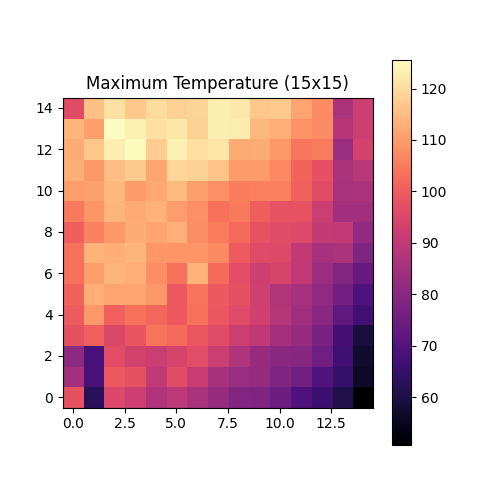

In [48]:
sample1 = tempPlot(1, "./Caleb/Old PC Data/15x15 (Right Up).dat",
                       "./Caleb/Old PC Data/15x15 (Left Down).dat",
                       delim = ",")

#### Sample 2 Data (No Rotation)

225 local maxima found
225 local maxima found


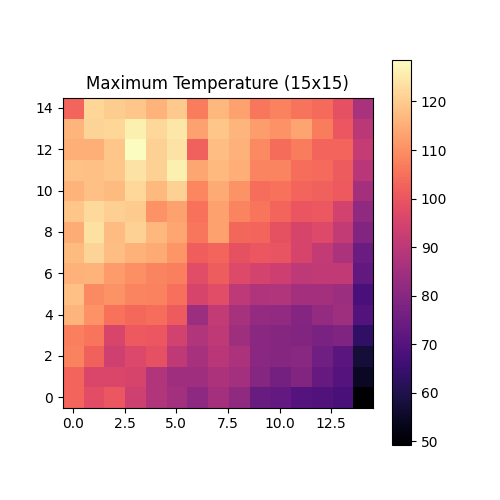

In [49]:
sample2 = tempPlot(2, "./Caleb/Old PC Data/Sample 2 15x15 Right Up.dat",
                       "./Caleb/Old PC Data/Sample 2 15x15 Left Down.dat",
                       delim = ",")

#### Sample 2 Data (Rotated CCW, Taken on new PC)


225 local maxima found
225 local maxima found


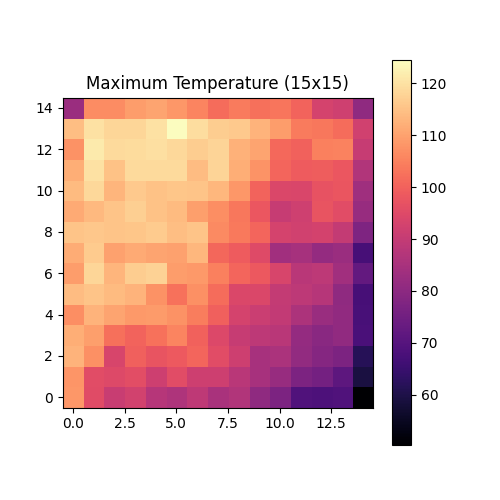

In [50]:
plt.close(3)
ru_data = ocsv.OptrisDataset("./Caleb/New PC Data/15x15 Right Up 1.dat",";").build_array_data()
ru_data = ru_data[ru_data["time"] <= TIME_CUTOFF]
ru_temp = medfilt(ru_data["Detector Area"], kernel_size = kernel_size)

dl_data = ocsv.OptrisDataset("./Caleb/New PC Data/15x15 Down Left 1.dat",";").build_array_data()
dl_data = dl_data[dl_data["time"] <= TIME_CUTOFF]
dl_temp = medfilt(dl_data["Detector Area"], kernel_size = kernel_size)

sample3 = (tempMap(getMaxima(ru_temp), "Right", "Up") +
                             tempMap(getMaxima(dl_temp), "Down", "Left")) / 2

fig3, ax3 = plt.subplots(figsize = (5,5), num=3)
ax3.set_title("Maximum Temperature (15x15)")
img3 = ax3.imshow(sample3,interpolation='nearest',
                    cmap = 'magma',
                    origin='lower')


plt.colorbar(img3, cmap = 'magma')

plt.show()

#### Sample 1 Data (New PC, accidental additional tape)

225 local maxima found
225 local maxima found


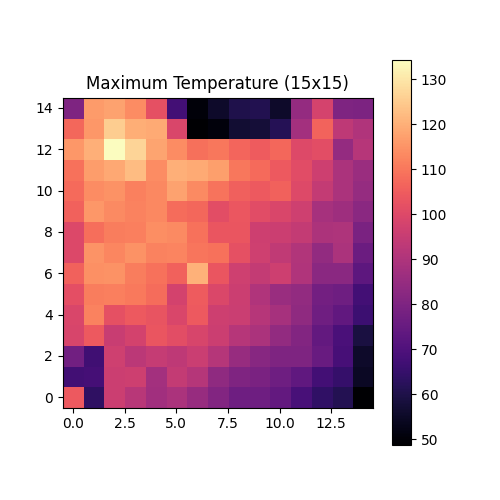

In [51]:
sample4 = tempPlot(4, "./Caleb/New PC Data/15x15 Right Up 2.dat",
                       "./Caleb/New PC Data/15x15 Left Down 2.dat")

#### Sample 1 Data (New PC, accidental tape removed)


225 local maxima found
225 local maxima found


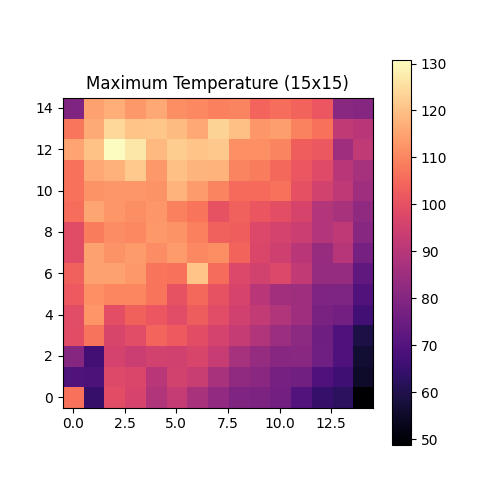

In [52]:
sample5 = tempPlot(5, "./Caleb/New PC Data/15x15 Right Up 3.dat",
                       "./Caleb/New PC Data/15x15 Left Down 3.dat")

#### Sample 2 Data (Rotated CW, taken on new PC)


225 local maxima found
225 local maxima found


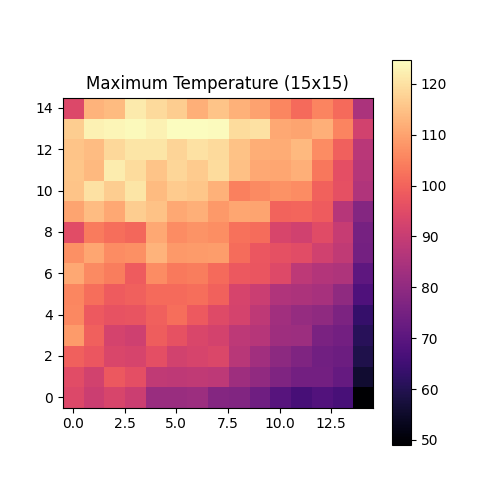

In [53]:
sample6 = tempPlot(6, "./Caleb/New PC Data/15x15 Right Up 4.dat",
                       "./Caleb/New PC Data/15x15 Left Down 4.dat")

#### Sample 2 Data (Rotated 180 degrees, taken on new PC)

225 local maxima found
225 local maxima found


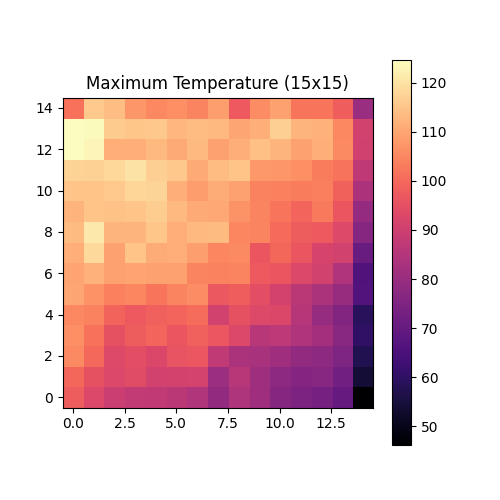

In [54]:
plt.close(9)
ru_data = ocsv.OptrisDataset("./Caleb/New PC Data/15x15 Right Up 5.dat",";").build_array_data()
ru_data = ru_data[ru_data["time"] <= TIME_CUTOFF]
ru_temp = medfilt(ru_data["Detector Area"], kernel_size = kernel_size)

ld_data = ocsv.OptrisDataset("./Caleb/New PC Data/15x15 Left Down 5.dat",";").build_array_data()
ld_data = ld_data[ld_data["time"] >= ld_data["time"].max() / 2]
ld_temp = medfilt(ld_data["Detector Area"], kernel_size = kernel_size)


sample7 = (tempMap(getMaxima(ru_temp), "Right", "Up") + 
              tempMap(getMaxima(ld_temp), "Left", "Down")) / 2

fig9, ax9 = plt.subplots(figsize = (5,5), num=9)
ax9.set_title("Maximum Temperature (15x15)")
img9 = ax9.imshow(sample7,interpolation='nearest',
                    cmap = 'magma',
                    origin='lower')


plt.colorbar(img9, cmap = 'magma')

plt.show()

## Comparison

225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found


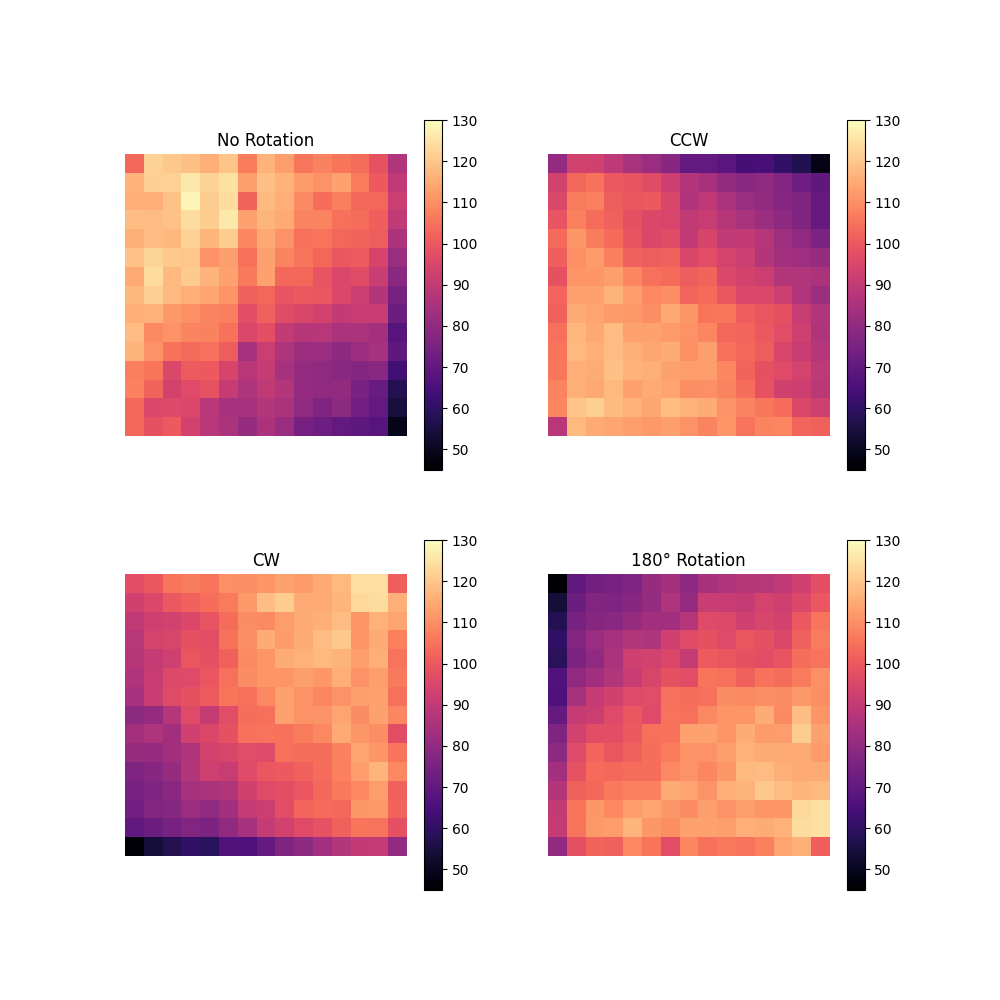

In [55]:
# Rotated Data for rotated samples (sample alignment is constant)

rotation0 = sample2
rotationCCW = (tempMap(getMaxima(ru_temp), "Up", "Left") +
                             tempMap(getMaxima(dl_temp), "Right", "Down")) / 2
rotationCW = (tempMap(getMaxima(ru_temp), "Down", "Right") +
                             tempMap(getMaxima(ld_temp), "Up", "Left")) / 2
rotation180 = (tempMap(getMaxima(ru_temp), "Left", "Down") +
                             tempMap(getMaxima(ld_temp), "Right", "Up")) / 2
rotations = [rotation0, rotationCCW, rotationCW, rotation180]


plt.close(8)
fig8, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10), num=8)
plots = [(ax1, rotation0, "No Rotation"), (ax2, rotationCCW, "CCW"), (ax3, rotationCW, "CW"), (ax4, rotation180, "180° Rotation")]

for plot in plots:
    plot[0].set_title(plot[2])
    img = plot[0].imshow(plot[1],interpolation='nearest',
                        cmap = 'magma',
                        origin='lower',
                        vmin = 45,
                        vmax = 130)
    plt.colorbar(img, cmap = 'magma')
    plot[0].set_axis_off()

[[101.275       84.025       94.675       92.29166667  86.85833333
   86.95833333  85.05        82.16666667  81.20833333  77.8
   74.525       69.91666667  68.28333333  66.18333333  49.025     ]
 [ 93.375       85.94166667  96.36666667  95.875       90.05
   91.90833333  90.15        86.70833333  84.50833333  81.575
   78.13333333  76.425       73.24166667  69.48333333  55.86666667]
 [ 97.78333333  90.35        94.43333333  95.275       95.3
   94.35833333  94.825       91.85833333  87.14166667  83.01666667
   81.1         79.65833333  76.25833333  72.04166667  58.25      ]
 [105.25       103.93333333  96.16666667  97.94166667 101.525
   99.475       96.31666667  94.4         90.025       86.76666667
   84.50833333  81.875       77.925       74.59166667  61.88333333]
 [105.50833333 107.99166667 101.86666667 102.31666667 102.41666667
  101.34166667  98.975       95.73333333  92.96666667  90.11666667
   87.36666667  83.59166667  80.35        77.725       65.48333333]
 [108.525      109.5

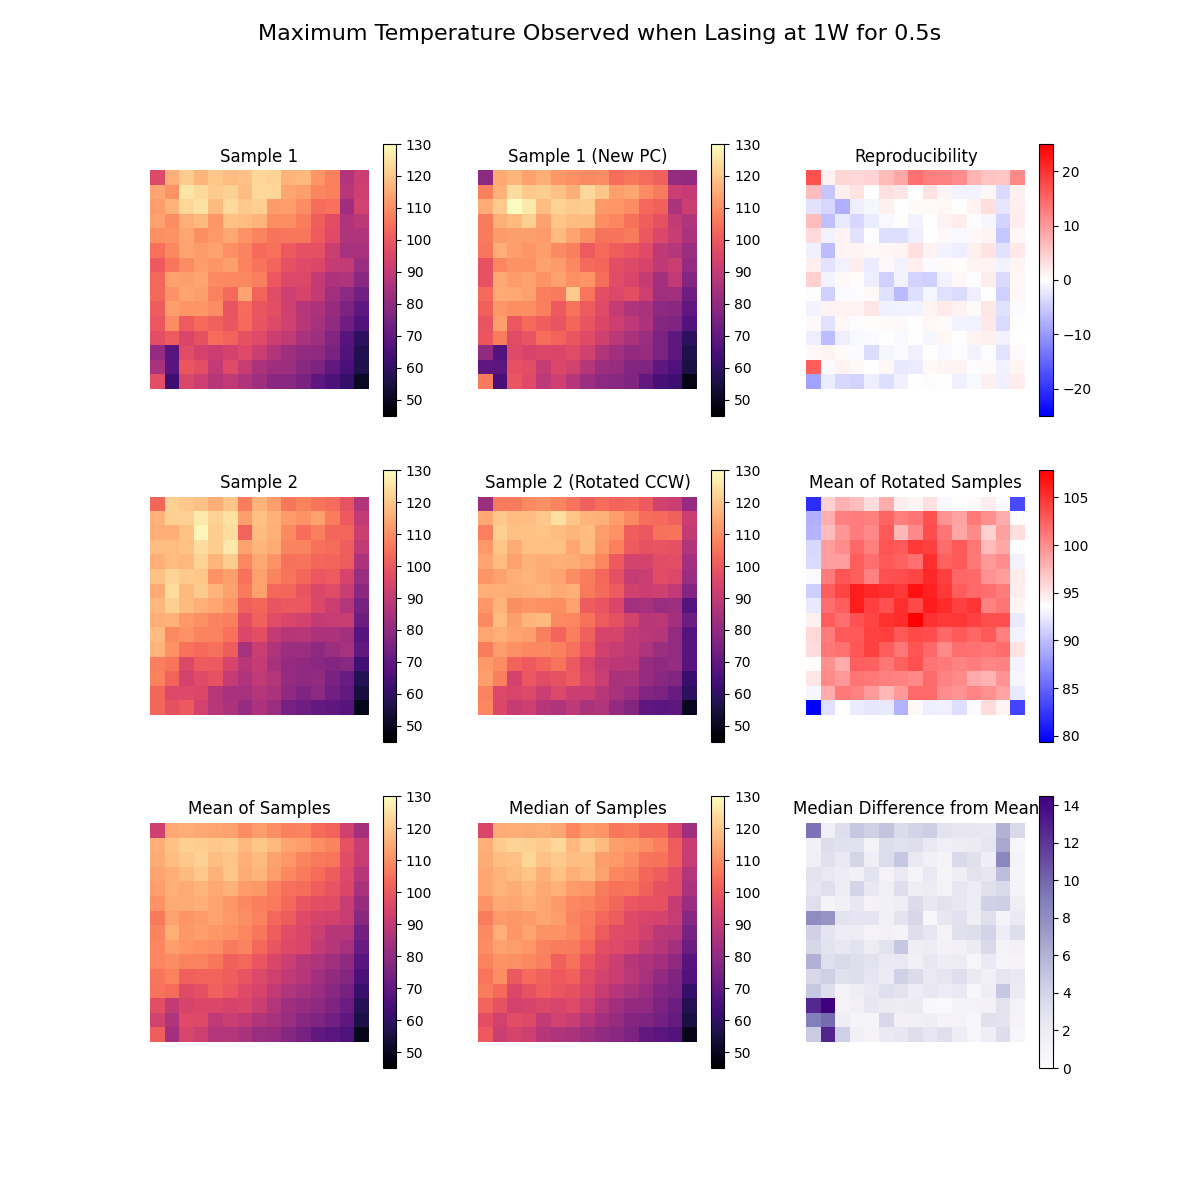

In [81]:
plt.close(7)
fig6, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize = (12,12), num=7)
fig6.suptitle("Maximum Temperature Observed when Lasing at 1W for 0.5s", fontsize=16)

samples = [sample1, sample2, sample3, sample5, sample6, sample7]
mean = np.mean(samples, axis = 0)
med = np.median(samples, axis = 0)
meddif = np.median(np.abs(samples - mean), axis = 0)

#———————————————————————————————————————————————————————— 15 x 15 Grid Comparison ————————————————————————————————————————————————————————#

plots = [[ax1, sample1, "Sample 1"],
           [ax2, sample5, "Sample 1 (New PC)"],
           [ax4, sample2, "Sample 2"],
           [ax5, sample3, "Sample 2 (Rotated CCW)"],
           [ax7, mean, "Mean of Samples"],
           [ax8, med, "Median of Samples"]]

for plot in plots:
    plot[0].set_title(plot[2])
    img = plot[0].imshow(plot[1],interpolation='nearest',
                        cmap = 'magma',
                        origin='lower',
                        vmin = 45,
                        vmax = 130)
    plt.colorbar(img, cmap = 'magma')
    plot[0].set_axis_off()



ax3.set_title("Reproducibility")
img3 = ax3.imshow(sample1 - sample5,interpolation='nearest',
                    cmap = 'bwr',
                    origin='lower',
                    vmin =  -25,
                    vmax = 25)
plt.colorbar(img3, cmap = 'bwr')
ax3.set_axis_off()


ax6.set_title("Mean of Rotated Samples")
img6 = ax6.imshow(np.mean(rotations, axis = 0),interpolation='nearest',
                    cmap = 'bwr',
                    origin='lower')
plt.colorbar(img6, cmap = 'bwr')
ax6.set_axis_off()

ax9.set_title("Median Difference from Mean")
img9 = ax9.imshow(meddif,interpolation='nearest',
                    cmap = 'Purples',
                    origin='lower',
                    vmin = 0)
plt.colorbar(img9)
ax9.set_axis_off()


plt.show()

## Camera Rotation

### Plot 1

225 local maxima found
225 local maxima found


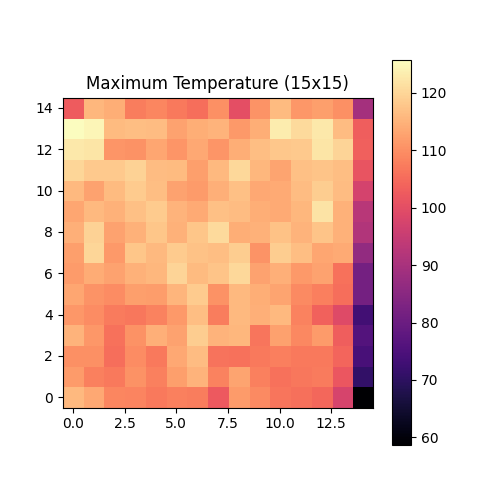

In [57]:
#Rotated Camera
sample8 = tempPlot(10, "./Caleb/New PC Data/Rotated Camera Right Up.dat",
                        "./Caleb/New PC Data/Rotated Camera Left Down.dat")

### Plot 2

225 local maxima found
225 local maxima found


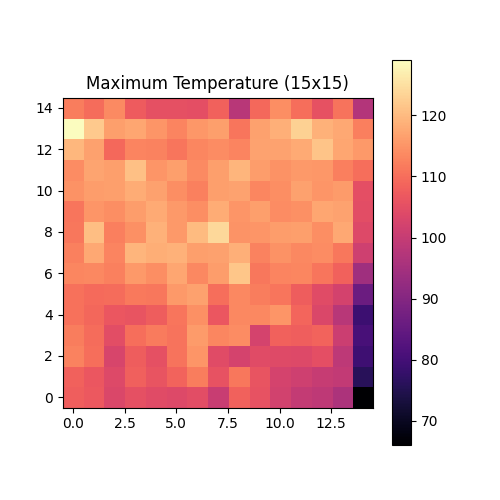

In [58]:
#Rotated Camera
sample9 = tempPlot(11, "./Caleb/New PC Data/Rotated Camera Right Up 2.dat",
                        "./Caleb/New PC Data/Rotated Camera Left Down 2.dat")



### Plot 3

225 local maxima found
225 local maxima found


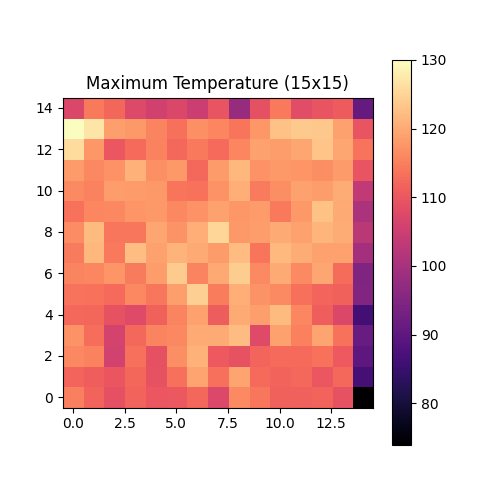

In [59]:
#Rotated Camera (Sample 2, 180 degree rotation)
sample10 = tempPlot(12, "./Caleb/New PC Data/Rotated Camera Right Up 3.dat",
                         "./Caleb/New PC Data/Rotated Camera Left Down 3.dat")



### Mean

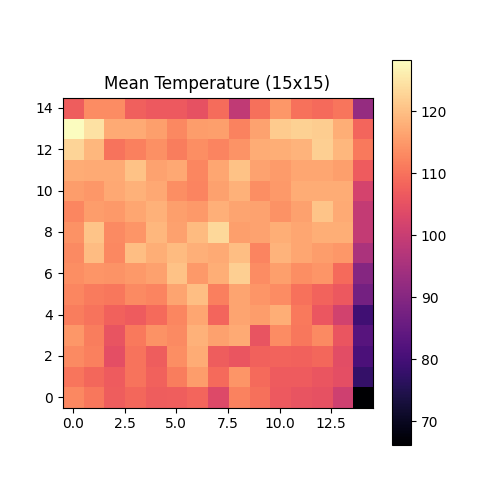

In [60]:
#Mean of Random Camera Rotations

plt.close(13)

fig13, ax13 = plt.subplots(figsize = (5,5), num=13)
ax13.set_title("Mean Temperature (15x15)")
img13 = ax13.imshow(np.mean((sample8, sample9, sample10), axis = 0),interpolation='nearest',
                    cmap = 'magma',
                    origin='lower')

plt.colorbar(img13, cmap = 'magma')

plt.show()



### Plot 4

225 local maxima found
225 local maxima found


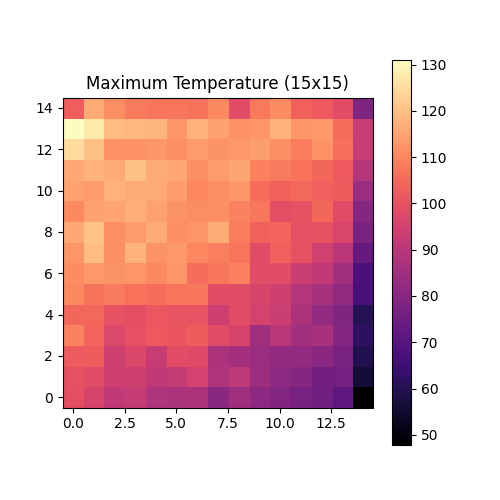

In [61]:
#Rotated Camera (Sample 2, 180 degree rotation)
sample11 = tempPlot(14, "./Caleb/New PC Data/Rotated Camera Right Up 4.dat",
                        "./Caleb/New PC Data/Rotated Camera Left Down 4.dat")


## Eclipse Testing

### Eclipse

225 local maxima found
225 local maxima found


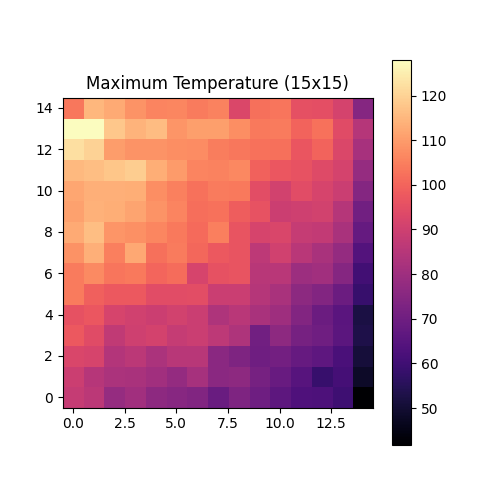

In [62]:
sample12 = tempPlot(15, "./Caleb/New PC Data/Eclipse Right Up 1.dat",
                         "./Caleb/New PC Data/Eclipse Left Down 1.dat",
                         trigger2 = 2)


### 2/3 Eclipse

225 local maxima found
227 local maxima found


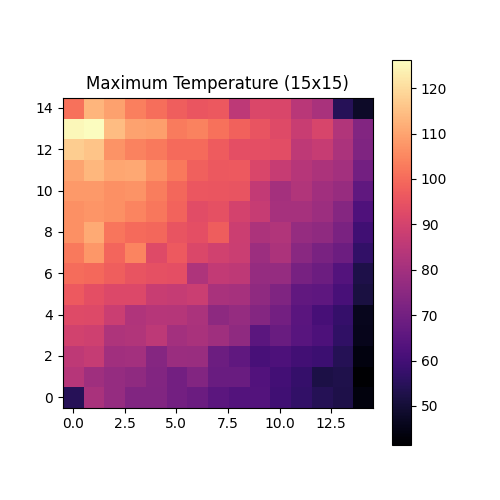

In [63]:
sample13 = tempPlot(16, "./Caleb/New PC Data/Eclipse Right Up 2.dat",
                         "./Caleb/New PC Data/Eclipse Left Down 2.dat",
                         trigger2 = 0.79)

### 2/3 Eclipse Rotated

225 local maxima found
225 local maxima found


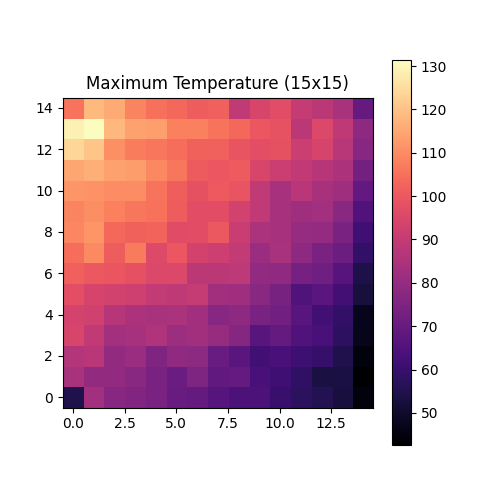

In [64]:
sample14 = tempPlot(17, "./Caleb/New PC Data/Eclipse Right Up 3.dat",
                         "./Caleb/New PC Data/Eclipse Left Down 3.dat",
                         trigger2 = 0.8)

### No Obscuration Attempts

225 local maxima found
225 local maxima found


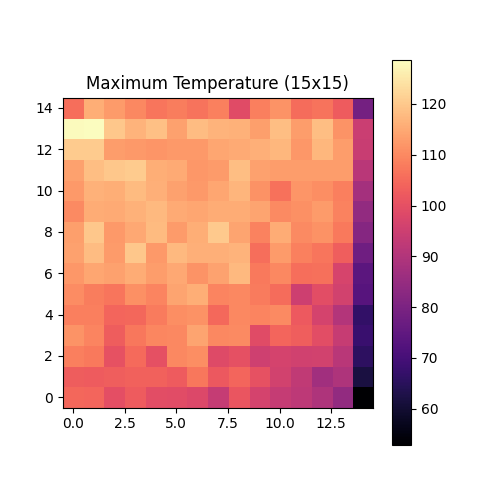

In [65]:
sample15 = tempPlot(18, "./Caleb/New PC Data/Eclipse Right Up 4.dat",
                         "./Caleb/New PC Data/Eclipse Left Down 4.dat")

225 local maxima found
225 local maxima found


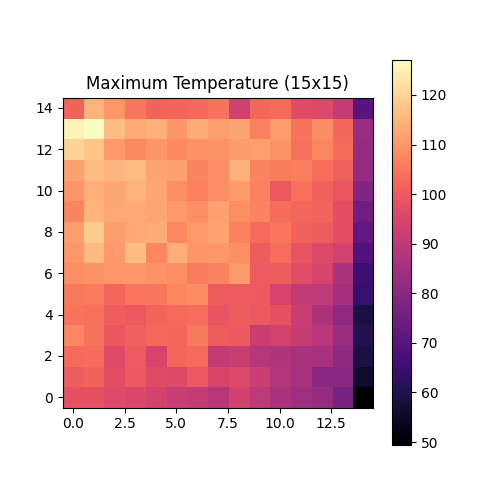

In [66]:
sample16 = tempPlot(19, "./Caleb/New PC Data/Eclipse Right Up 5.dat",
                         "./Caleb/New PC Data/Eclipse Left Down 5.dat",
                         trigger2 = 1)

225 local maxima found
225 local maxima found


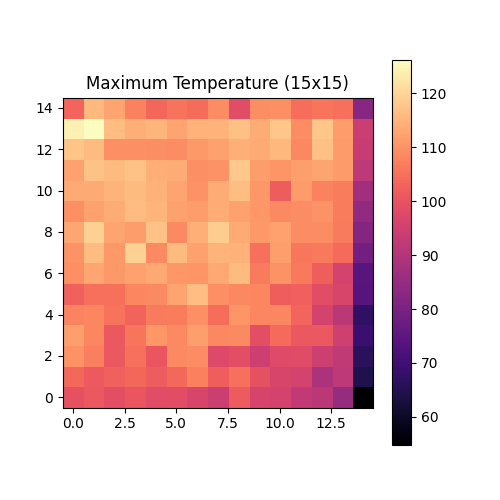

In [67]:
sample17 = tempPlot(20, "./Caleb/New PC Data/Unobscured Right Up 1.dat",
                         "./Caleb/New PC Data/Unobscured Left Down 1.dat",
                         trigger2 = 1)

225 local maxima found
225 local maxima found


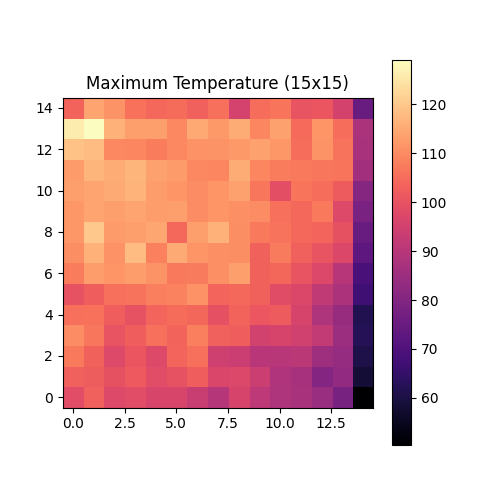

In [68]:
sample18 = tempPlot(21, "./Caleb/New PC Data/Unobscured Right Up 2.dat",
                         "./Caleb/New PC Data/Unobscured Left Down 2.dat",
                         trigger2 = 1)

### 1/2 Eclipse

225 local maxima found
225 local maxima found


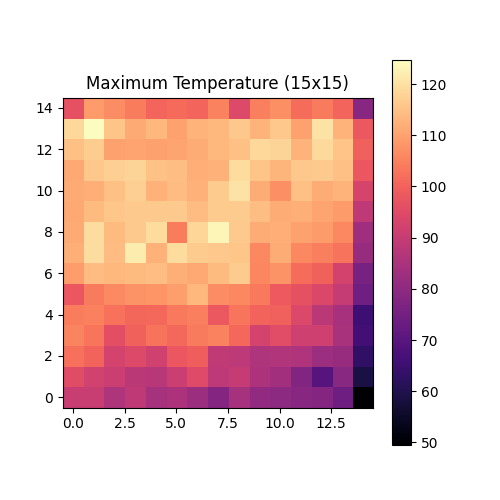

In [69]:
sample19 = tempPlot(22, "./Caleb/New PC Data/Eclipse Right Up 6.dat",
                         "./Caleb/New PC Data/Eclipse Left Down 6.dat",
                         trigger2 = 1)

## New Mount

225 local maxima found
225 local maxima found


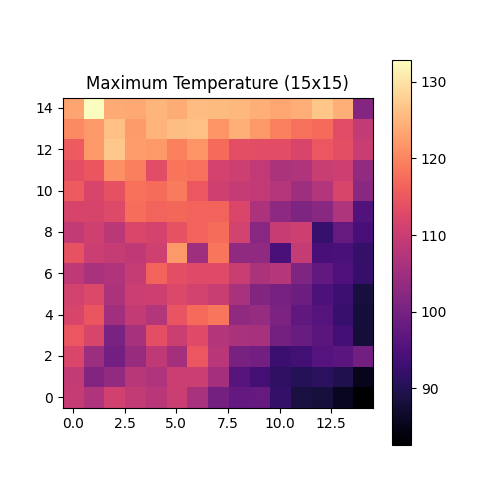

In [70]:
# Corner Mount, lased area positioned at original spot

sample20 = tempPlot(23, "./Caleb/New PC Data/Corner Mount Right Up 1.dat",
                         "./Caleb/New PC Data/Corner Mount Left Down 1.dat")

225 local maxima found
225 local maxima found


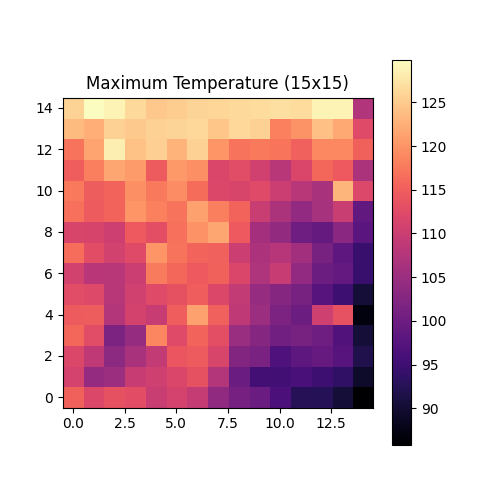

In [71]:
# Corner mount, lased area positioned in bottom right corner of screen

sample21 = tempPlot(24, "./Caleb/New PC Data/Corner Mount Right Up 2.dat",
                         "./Caleb/New PC Data/Corner Mount Left Down 2.dat")

225 local maxima found
225 local maxima found


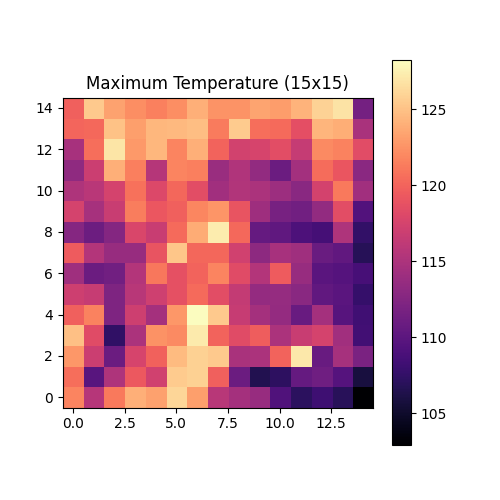

In [72]:
# Corner mount, lased area positioned in top center of screen

sample22 = tempPlot(25, "./Caleb/New PC Data/Corner Mount Right Up 3.dat",
                         "./Caleb/New PC Data/Corner Mount Left Down 3.dat")

225 local maxima found
225 local maxima found


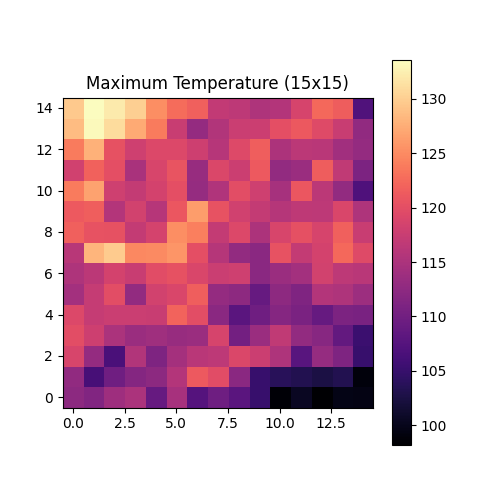

In [73]:
# Corner mount, lased area positioned in top center of screen, rotated 90 degrees

sample23 = tempPlot(26, "./Caleb/New PC Data/Corner Mount Right Up 4.dat",
                         "./Caleb/New PC Data/Corner Mount Left Down 4.dat")

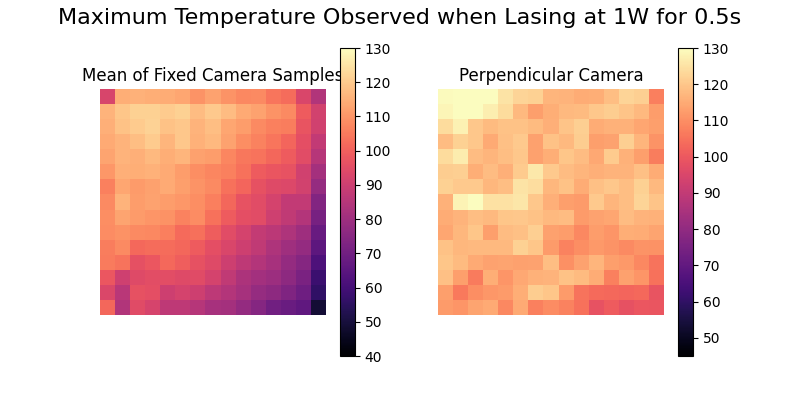

In [74]:
plt.close(27)
fig6, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4), num=27)
fig6.suptitle("Maximum Temperature Observed when Lasing at 1W for 0.5s", fontsize=16)

ax1.set_title("Mean of Fixed Camera Samples")
img1 = ax1.imshow(mean,interpolation='nearest',
                    cmap = 'magma',
                    origin='lower',
                    vmin =  40,
                    vmax = 130)
plt.colorbar(img1, cmap = 'magma')
ax1.set_axis_off()

ax2.set_title("Perpendicular Camera")
img2 = ax2.imshow(sample23,interpolation='nearest',
                    cmap = 'magma',
                    origin='lower',
                    vmin =  45,
                    vmax = 130)
plt.colorbar(img2, cmap = 'magma')
ax2.set_axis_off()

225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found


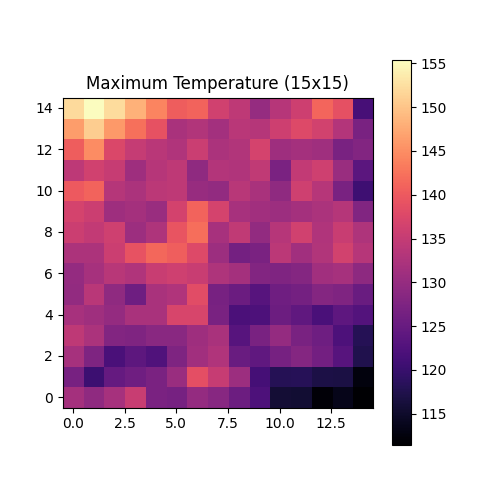

In [75]:
# Lasing at 0.5W for 1s to see if the temperature is more stable

sample24 = tempPlot(28, "./Caleb/New PC Data/Corner Mount Right Up 5.dat",
                         "./Caleb/New PC Data/Corner Mount Left Down 5.dat",
                         "./Caleb/New PC Data/Corner Mount Right Down 5.dat",
                         "./Caleb/New PC Data/Corner Mount Left Up 5.dat")

225 local maxima found
225 local maxima found
225 local maxima found
225 local maxima found


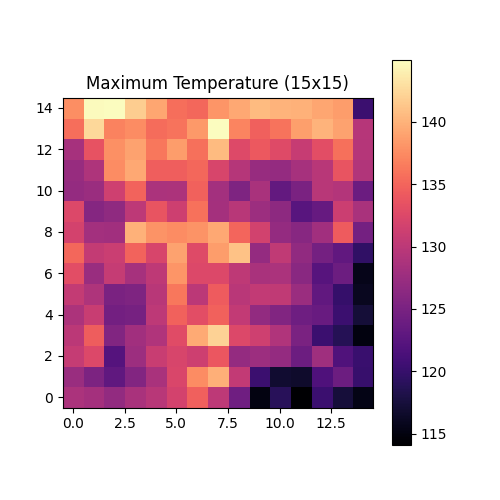

In [76]:
# Lasing at 0.5W for 1s to see if the temperature is more stable

sample25 = tempPlot(29, "./Caleb/New PC Data/Corner Mount Right Up 6.dat",
                         "./Caleb/New PC Data/Corner Mount Left Down 6.dat",
                         "./Caleb/New PC Data/Corner Mount Right Down 6.dat",
                         "./Caleb/New PC Data/Corner Mount Left Up 6.dat")

### Calibration

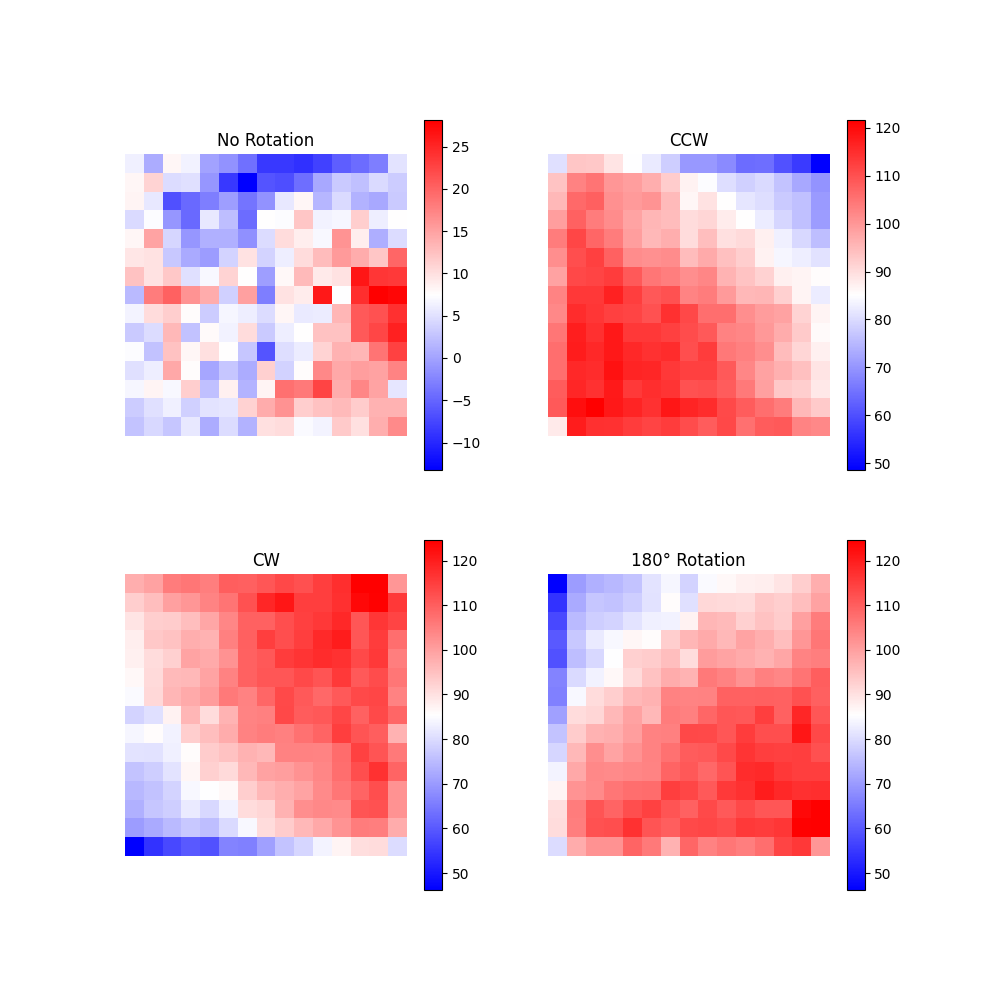

In [77]:
# Rotated Data for rotated samples (sample alignment is constant)


plt.close(30)
fig8, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10), num=30)
plots = [(ax1, sample23 - sample20, "No Rotation"), (ax2, rotationCCW, "CCW"), (ax3, rotationCW, "CW"), (ax4, rotation180, "180° Rotation")]

for plot in plots:
    plot[0].set_title(plot[2])
    img = plot[0].imshow(plot[1],interpolation='nearest',
                        cmap = 'bwr',
                        origin='lower')
    plt.colorbar(img, cmap = 'magma')
    plot[0].set_axis_off()